# Explatory Data Analysis
Forex USDJPY Trend Prediction Using Machine Learning Python

In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats

In [4]:
# Load the Dataset
df = pd.read_csv(r'C:\Users\Arie\Documents\Portfolio\Forex Trend Analysis Project\Dataset\clean_usdjpy.csv')
df.head()

,datetime,open,high,low,close
0,2025-07-07,144.48300,144.85001,144.22000,144.80800
1,2025-07-04,144.91499,144.97099,144.17999,144.44299
2,2025-07-03,143.65900,145.23399,143.44200,144.90500
3,2025-07-02,143.42900,144.24400,143.31700,143.61000
4,2025-07-01,143.99800,144.05099,142.67599,143.38699


In [ ]:
df = df.set_index('datetime')
df = df.sort_index()
df.head()

In [8]:
df.describe()

,open,high,low,close
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,110.844060,111.312461,110.334478,110.857531
std,19.810656,19.883836,19.728096,19.818202
min,75.763000,76.003500,75.577500,75.824000
25%,99.145000,99.677500,98.525000,99.117500
50%,109.420000,109.770000,109.062500,109.410000
75%,119.132500,119.600000,118.662500,119.150000
max,161.675000,161.995000,161.270000,161.705000


In [9]:
# Candlestick
fig = go.Figure(data = [go.Candlestick(x = df.index, open = df['open'],
                                       high = df['high'],
                                       low = df['low'],
                                       close = df['close'])])

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

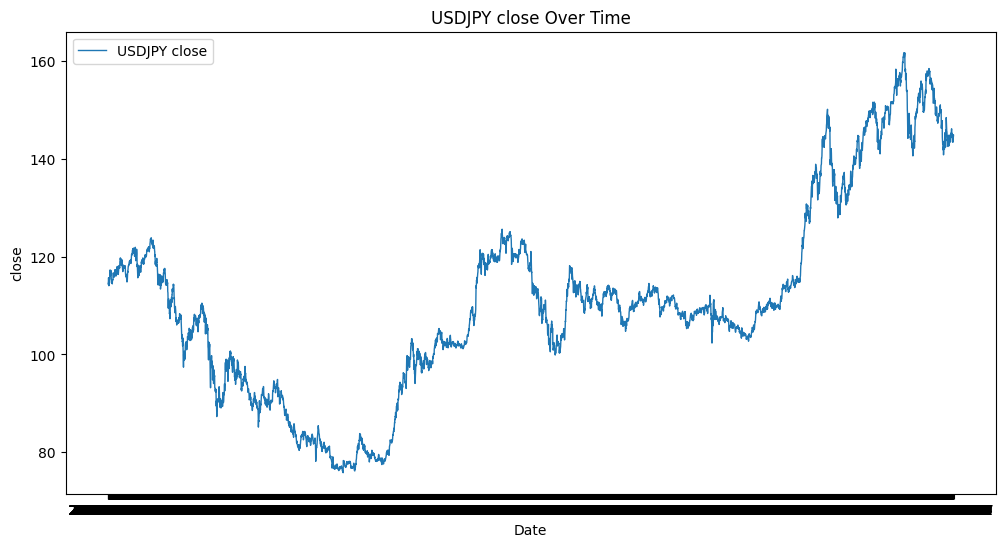

In [10]:
# USDJPY close Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label = 'USDJPY close', linewidth = 1)
plt.title('USDJPY close Over Time')
plt.xlabel('Date')
plt.ylabel('close')
plt.legend()
plt.show()

In [11]:
# Creating Moving Average Value

ma50 = df.close.rolling(50).mean()
ma20 = df.close.rolling(20).mean()
ma15 = df.close.rolling(15).mean()

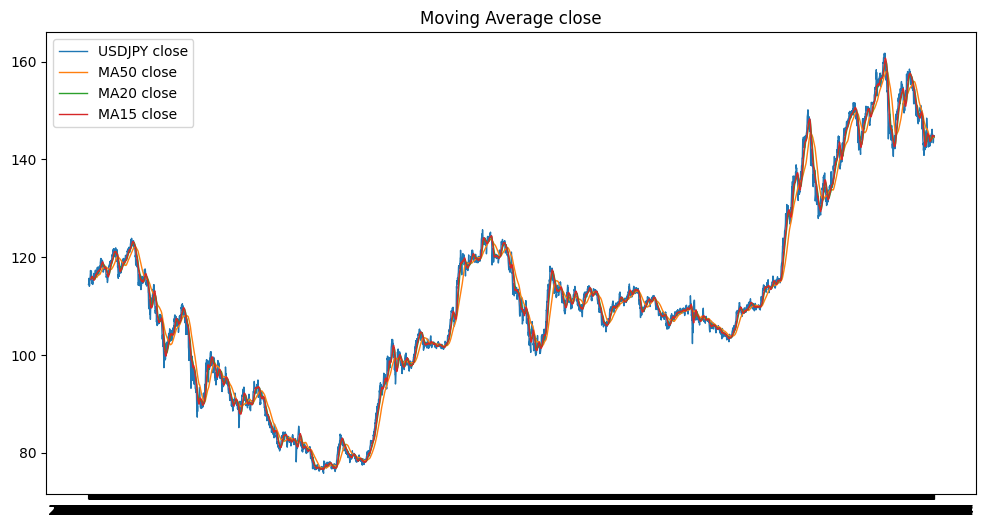

In [12]:
# close and Moving Average Comparison

plt.figure(figsize=(12,6))
plt.plot(df.close, label = 'USDJPY close', linewidth = 1)
plt.plot(ma50, label = 'MA50 close', linewidth = 1)
plt.plot(ma20, label = 'MA20 close', linewidth = 1)
plt.plot(ma15, label = 'MA15 close', linewidth = 1)
plt.title('Moving Average close')
plt.legend()
plt.show()

In [13]:
ema = df.close.ewm(com=12).mean()

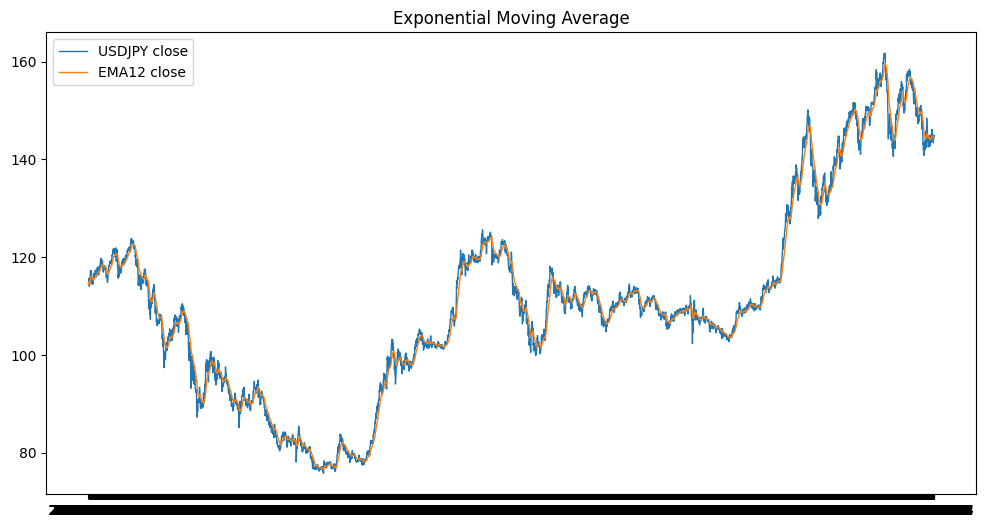

In [14]:
# Exponential Moving Average and close Comparison

plt.figure(figsize=(12,6))
plt.plot(df.close, label = 'USDJPY close', linewidth = 1)
plt.plot(ema, label = 'EMA12 close', linewidth = 1)
plt.title('Exponential Moving Average')
plt.legend()
plt.show()

In [15]:
# Relative Strength Index
import ta

rsi = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()

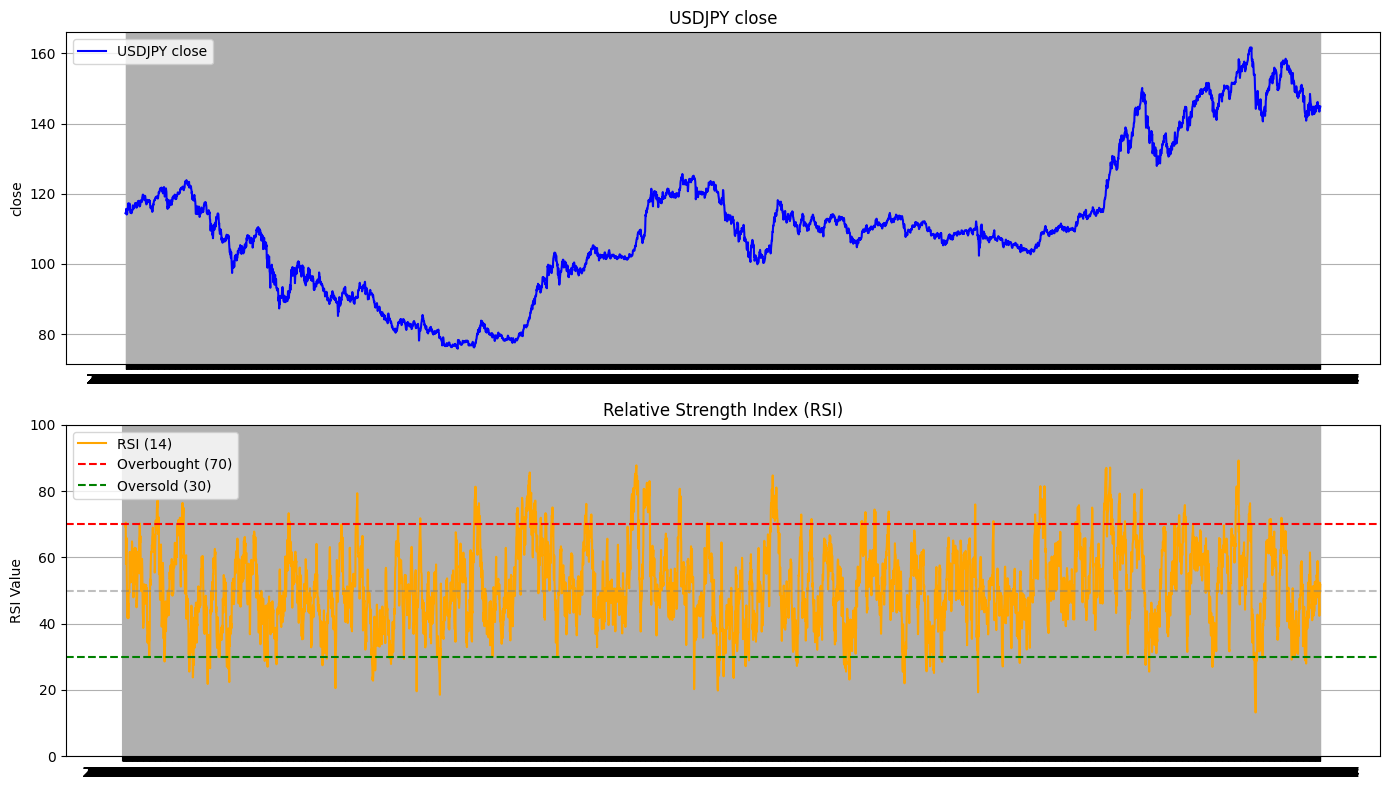

In [16]:
# Plotting RSI

plt.figure(figsize=(14, 8))

# ---- Subplot 1: close ----
plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], label='USDJPY close', color='blue')
plt.title('USDJPY close')
plt.ylabel('close')
plt.grid(True)
plt.legend()

# ---- Subplot 2: RSI ----
plt.subplot(2, 1, 2)
plt.plot(df.index, rsi, label='RSI (14)', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI Value')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()